# Estimating Pi

The following example should highlight, how one can convert most Python classes that take arguments into a ZnTrack stage.
Here we take on an example to Estimate the value Pi.
The original notebook can be found here https://gist.github.com/SamTov/907aebbc6c36a242e15e3745a91989eb .
There were only a few changes made:

    1. convert parameters to `zn.params()`
    2. convert results to `zn.outs()`
    3. modify the `__init__` method for the adding the parameters to the class
    4. Add a `run` method that does the heavy lifting for us and runs the expensive computation

That's it - now we can inherit from `zntrack.Node` and we can even stay inside the Jupyter notebook.

In [1]:
from zntrack import ZnTrackProject, config

config.nb_name = "estimate_pi_with_mc.ipynb"

In [2]:
from zntrack.utils import cwd_temp_dir

temp_dir = cwd_temp_dir()

In [3]:
project = ZnTrackProject()
project.create_dvc_repository()

2022-01-14 17:29:38,009 (INFO): Setting up GIT/DVC repository.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from zntrack import Node, zn

In [5]:
class MCPi(Node):
    """
    A class to study Monte Carlo sampling as applied to
    the computation of Pi.

    Attributes
    ----------
    coordinates : np.ndarray
            Coordinates of points plotted.
    n_circle_points : int
            Number of points in the circle
    n_points : int
            Total number of points.
    """

    coordinates = zn.outs()
    n_circle_points = zn.outs()
    n_points = zn.params()

    def __init__(self, n_points=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.n_points = n_points

    def run(self):
        """
        Draw N points from a normal distribution.

        N : int
                Number of points to draw.
        """
        self.coordinates = np.random.random(size=(self.n_points, 2))
        self._circle_points()  # compute the number of points in the circle.

    def _circle_points(self):
        """
        Compute the number of points in the circle.
        """
        radial_values = np.linalg.norm(self.coordinates, axis=1)
        self.n_circle_points = len(list(filter(lambda x: x <= 1, radial_values)))

    def plot_image(self, axs=None):
        """
        Plot the circle, square, and points.

        Parameters
        ----------
        axs : mpl.axis
                An axis object to plot to if desired.
        """
        circle = plt.Circle((0, 0), 1, fill=False)
        square = patches.Rectangle((0, 0), 1, 1, fill=False)
        if axs is None:
            ax = plt.gca()
        else:
            ax = axs
        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.spines.left.set_position("zero")
        ax.spines.right.set_color("none")
        ax.spines.bottom.set_position("zero")
        ax.spines.top.set_color("none")
        ax.xaxis.set_ticks_position("bottom")
        ax.yaxis.set_ticks_position("left")
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.set_aspect("equal")
        plt.show()

    def plot_sampling(self, axs=None, show: bool = False):
        """
        Plot the result of the sampling.

        Parameters
        ----------
        axs : mpl.axis
                An axis object to plot to if desired.
        """
        coordinates = np.array(self.coordinates)
        circle = plt.Circle((0, 0), 1, fill=False, linewidth=3, edgecolor="k", zorder=10)
        square = patches.Rectangle(
            (0, 0), 1, 1, fill=False, linewidth=3, edgecolor="k", zorder=10
        )
        if axs is None:
            ax = plt.gca()
        else:
            ax = axs
        ax.set_xlim(-0.0, 1.0)
        ax.set_ylim(-0.0, 1.0)
        ax.spines.left.set_position("zero")
        ax.spines.right.set_color("none")
        ax.spines.bottom.set_position("zero")
        ax.spines.top.set_color("none")
        ax.xaxis.set_ticks_position("bottom")
        ax.yaxis.set_ticks_position("left")
        ax.plot(coordinates[:, 0], coordinates[:, 1], ".")
        inner_points = np.array(
            list(filter(lambda x: np.linalg.norm(x) <= 1, coordinates))
        )
        ax.plot(inner_points[:, 0], inner_points[:, 1], "r.")
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.set_title(
            f"N: {self.n_points} ; $\pi$ = {4 * self.n_circle_points / self.n_points}"
        )
        ax.set_aspect("equal")

        if show:
            plt.show()

Now let us define pi estimates with different numbers of points and run them all.

In [6]:
MCPi(n_points=50000).write_graph()

2022-01-14 17:29:39,723 (WARNING): Jupyter support is an experimental feature! Please save your notebook before running this command!
Submit issues to https://github.com/zincware/ZnTrack.
2022-01-14 17:29:39,724 (WARNING): Converting estimate_pi_with_mc.ipynb to file MCPi.py
2022-01-14 17:29:42,273 (WARNING): --- Writing new DVC file! ---
2022-01-14 17:29:43,787 (INFO): Creating 'dvc.yaml'
Adding stage 'MCPi' in 'dvc.yaml'

To track the changes with git, run:

	git add dvc.yaml 'nodes\MCPi\.gitignore'



In [7]:
MCPi(n_points=10000).write_graph()
project.name = "n=10000"
project.queue()

MCPi(n_points=1000).write_graph()
project.name = "n=1000"
project.queue()

MCPi(n_points=100).write_graph()
project.name = "n=100"
project.run()

2022-01-14 17:29:43,793 (WARNING): Jupyter support is an experimental feature! Please save your notebook before running this command!
Submit issues to https://github.com/zincware/ZnTrack.
2022-01-14 17:29:43,794 (WARNING): Converting estimate_pi_with_mc.ipynb to file MCPi.py
2022-01-14 17:29:46,294 (WARNING): --- Writing new DVC file! ---
2022-01-14 17:29:47,745 (INFO): Modifying stage 'MCPi' in 'dvc.yaml'

To track the changes with git, run:

	git add dvc.yaml

2022-01-14 17:29:47,746 (INFO): Running git add
2022-01-14 17:29:47,812 (INFO): Queue DVC stage
2022-01-14 17:29:49,371 (WARNING): Jupyter support is an experimental feature! Please save your notebook before running this command!
Submit issues to https://github.com/zincware/ZnTrack.
2022-01-14 17:29:49,372 (WARNING): Converting estimate_pi_with_mc.ipynb to file MCPi.py
2022-01-14 17:29:51,947 (WARNING): --- Writing new DVC file! ---
2022-01-14 17:29:53,549 (INFO): Modifying stage 'MCPi' in 'dvc.yaml'

To track the changes with 

We can now see our experiments and the respective hash values:


Let us load them and plot them after each other. Because all the calculations where already performed, this is simply loading the correct result files.

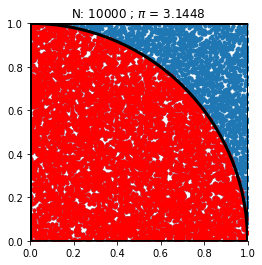

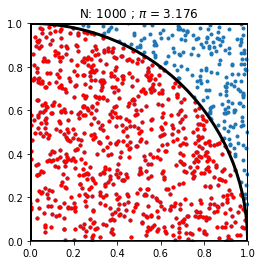

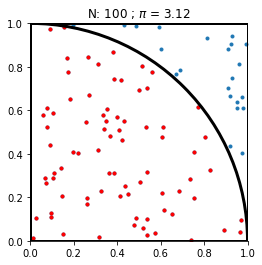

In [8]:
project.load("n=10000")
MCPi.load().plot_sampling(show=True)
project.load("n=1000")
MCPi.load().plot_sampling(show=True)
project.load("n=100")
MCPi.load().plot_sampling(show=True)

In [9]:
MCPi.load().coordinates

array([[0.41756016, 0.73738432],
       [0.53769174, 0.09930103],
       [0.42269601, 0.46482562],
       [0.9619941 , 0.81252859],
       [0.48936686, 0.98603174],
       [0.31043897, 0.41634349],
       [0.36086825, 0.31290451],
       [0.47605389, 0.0733034 ],
       [0.57576481, 0.03395104],
       [0.97112259, 0.09580588],
       [0.07864518, 0.52113064],
       [0.97644796, 0.4047958 ],
       [0.559272  , 0.77726325],
       [0.02817591, 0.10630643],
       [0.80245355, 0.47637073],
       [0.26422162, 0.84558214],
       [0.91743474, 0.4351785 ],
       [0.41424751, 0.20754602],
       [0.0909041 , 0.43878923],
       [0.38472358, 0.31161935],
       [0.53590912, 0.3173024 ],
       [0.95328534, 0.61207892],
       [0.59519528, 0.98104895],
       [0.77192238, 0.61607705],
       [0.89347275, 0.0499769 ],
       [0.61671705, 0.14118952],
       [0.60755183, 0.217621  ],
       [0.92714927, 0.74954543],
       [0.65488594, 0.12367283],
       [0.60294949, 0.88172155],
       [0.

In [ ]:
temp_dir.cleanup()